In [1]:
# Loading Libraries

# Warning Librarires
import warnings 
warnings.filterwarnings("ignore")

# Scientific and Data Manipulation Libraries 
import re
import os
import math
import nltk
import gensim
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix

from nltk.corpus import stopwords

from bs4 import BeautifulSoup
%matplotlib inline



In [2]:
# Loading Data
!gdown --id 1xqbJqmCpQyQjv8f4xPW8ApUYwBuOcqRt --output train.csv
!gdown --id 1uuB0K00Yl4weUWrsilTLHzkERmpm5Oio --output test.csv
!gdown --id 1u6xKBfVHiawkNLfWZrlnpstd4j9q4Y5H --output sample.csv

# 
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
sample_data = pd.read_csv('sample.csv')

Downloading...
From: https://drive.google.com/uc?id=1xqbJqmCpQyQjv8f4xPW8ApUYwBuOcqRt
To: /content/train.csv
3.16MB [00:00, 97.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1uuB0K00Yl4weUWrsilTLHzkERmpm5Oio
To: /content/test.csv
100% 1.38M/1.38M [00:00<00:00, 91.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1u6xKBfVHiawkNLfWZrlnpstd4j9q4Y5H
To: /content/sample.csv
100% 8.69k/8.69k [00:00<00:00, 8.35MB/s]


In [3]:
train_data.head()

,ID,Text,Label
0,ID_AASHwXxg,Mwangonde: Khansala wachinyamata Akamati achi...,POLITICS
1,ID_AGoFySzn,MCP siidakhutire ndi kalembera Chipani cha Ma...,POLITICS
2,ID_AGrrkBGP,Bungwe la MANEPO Lapempha Boma Liganizire Anth...,HEALTH
3,ID_AIJeigeG,Ndale zogawanitsa miyambo zanyanya Si zachile...,POLITICS
4,ID_APMprMbV,Nanga wapolisi ataphofomoka? Masiku ano sichi...,LAW/ORDER


In [4]:
test_data.head()

,ID,Text
0,ID_ADHEtjTi,Abambo odzikhweza akuchuluka Kafukufuku wa ap...
1,ID_AHfJktdQ,Ambuye Ziyaye Ayamikira Aphunzitsi a Tilitonse...
2,ID_AUJIHpZr,Anatcheleza: Akundiopseza a gogo wanga Akundi...
3,ID_AUKYBbIM,Ulova wafika posauzana Adatenga digiri ya uph...
4,ID_AZnsVPEi,"Dzombe kukoma, koma Kuyambira makedzana, pant..."


In [5]:
train_data.shape , test_data.shape

((1436, 3), (620, 2))

In [6]:
sample_data.head()

,ID,Label
0,ID_sQaPRMWO,0
1,ID_TanclvfR,0
2,ID_CNbveyvk,0
3,ID_MclKMhyP,0
4,ID_rNrmXOGD,0


In [7]:
train_data.isnull().sum()

ID       0
Text     0
Label    0
dtype: int64

Counter({'POLITICS': 279, 'SOCIAL': 152, 'RELIGION': 147, 'LAW/ORDER': 136, 'SOCIAL ISSUES': 134, 'HEALTH': 127, 'ECONOMY': 86, 'FARMING': 78, 'SPORTS': 49, 'EDUCATION': 43, 'RELATIONSHIPS': 39, 'WILDLIFE/ENVIRONMENT': 36, 'OPINION/ESSAY': 26, 'LOCALCHIEFS': 25, 'CULTURE': 23, 'WITCHCRAFT': 16, 'MUSIC': 15, 'TRANSPORT': 11, 'ARTS AND CRAFTS': 7, 'FLOODING': 7})


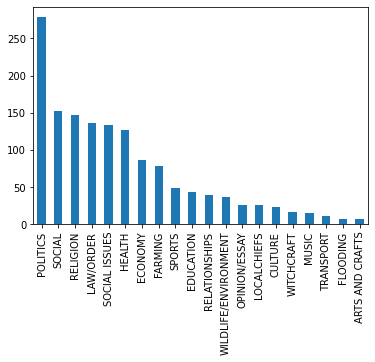

In [8]:
from collections import Counter
my_tags = Counter(train_data["Label"])
print(my_tags)
train_data.Label.value_counts().plot(kind='bar');

In [9]:
def print_plot(index):
    example = train_data[train_data.index == index][['Text', 'Label']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Label:', example[1])

print_plot(10)

 Kuchoka kwa Phoya kutisokoneza, atero ena Anthu mmadera osiyanasiyana msabatayi ati kuchoka kwa phungu wa chipani cholamula cha DPP mdera la ku mmawa mboma la Blantyre, Henry Phoya kwasiya mafunso ambiri mmitu yawo zomwe ati zingawasokoneze podzavota mchaka cha 2014.
 Anthuwa ati kuchokako kukusonyeza kuti kuchipani cholamula kwavunda zomwe ati zawachititsa kakasi kuti aone komwe angadzaponye voti yawo.
  Chisale watuluka nkumangidwanso  Sipakala waimitsa Nyumba ya Malamulo  Chakwera akwanitse malonjezoHRDC Koma katswiri wa za mbiri ya kale, Chijere Chirwa wati andale amachokachoka mzipani zawo kapena kuyambitsa chipani chawo kotero izi sizikuyenera kusokoneza anthu.
 Iye adati kuchoka kwa Phoya ukhale mwayi wa chipani cha DPP kuti apeze anthu ena atsopano omwe angamange chipanicho.
 Phoya Lachiwiri adalengeza kuti walowa chipani cha MCP. Iye adalengeza izi pa msonkhano wa atolankhani omwe udachitikira kunyumba ya mtsogoleri wa chipanichi, John Tembo.
 Pomwe Phoya amalengeza nkhaniyi,

In [10]:
# nltk.download('stopwords')
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text
    
# train_data['Text'] = train_data['Text'].apply(clean_text)
# print_plot(10)

In [11]:
X = []
for i in range(train_data.shape[0]):
    X.append(clean_text(train_data.iloc[i][1]))
y = np.array(train_data["Label"])
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state = 42)


**Results on the Test Data**

In [12]:
# X_train = []
# X_test = []
# for i in range(train_data.shape[0]):
#     X_train.append(clean_text(train_data.iloc[i][1]))
# y_train = np.array(train_data["Label"])

# for i in range(test_data.shape[0]):
#     X_test.append(clean_text(test_data.iloc[i][1]))

# # X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state = 42)

In [13]:
X_train[1:5]

['maneb ikhutila ndi mayeso sitandade 8 bungwe loyendetsa mayeso la malawi national examinations board maneb lati lakhutira ndi mmene mayeso sitandade 8 ayambira chisale watuluka nkumangidwanso sipakala waimitsa nyumba ya malamulo chakwera akwanitse malonjezohrdc mkulu wa bungweli roy hauya adanena izi lachinayi atayendera malo angapo komwe ophunzira amalembera mayeso kuyambira lachitatu lachitatu hauya adayendera sukulu zina ku blantyre ndipo lachinayi adali ku lilongwe takondwa ndi mmene mayeso ayambira nditsimikizire dziko lonse kuti mayeso akuyenda bwino anzathu achitetezo akugwira ntchito yawo bwino ndipo ophunzira akulemba momasukatikufuna zipitirire chonchi mmene tikhale tikuyamba mayeso ena mwezi ukubwerawu adatero hauya koma iye adavomereza kuti alandira lipoti lochokera mboma la mchinji loti munthu wina amalembera wophunzira wina mayeso pakadalipano tingati talandira mlandu umodzi wa mayesowawolembera mnzake mayeso amugwira ku mchinji adatero hauya ophunzira adamaliza mayeso 

In [14]:
print_plot(30)

 Tinkaimba limodzi kwaya Mdalitso suoneka pakudza munthu umangozindikira walandira mphatso koma osadziwa kuti yachoka kuti malingana ndi ntchito zomwe ukuchita monga momwe a mvula zakale adanenera kuti ntchito iliyonse ili ndi mphotho yake.
  Pa Wenela pasintha zedi  ANatchereza  Tidakumana ku sukulu ku Chiradzulu Kudzipereka komwe adachita Joseph Kaluwa ndi Victoria Mdala Kaluwa mchaka cha 2014 posankha kutumikira Mulungu mnjira ya kwaya patchalitchi ya mpingo wa chikatolika wa Don Bosco ku Lilongwe kudawalunjikitsira kumoyo wina wopambana.
 Awiriwa akuti amaimba kwaya limodzi ndipo kenako adagwa mchikondi atakhutitsidwa kuti iwo adalengedwa kuti adzakhale limodzi ngakhale kuti adabadwira ndi kukulira mbali ziwiri zosiyana za dziko lino la Malawi.
 Joseph ndi Victoria tsiku la ukwati wawo Ndinkasangalala tikamaimba ndipo ndikamamva mawu ake a nthetemya. China chomwe chidanditenga mtima nchakuti amakonda kupemphera ndi kutumikira kutchalitchi, adatero Joseph.
 Iye adati adayesetsa kuti

**Naive Bayes Classifier for Multinomial Models**

In [15]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [16]:
%%time
from sklearn.metrics import classification_report
y_pred = nb.predict(X_val)

print('Naive Bayes Classifier for Multinomial Models -  accuracy - %s' % accuracy_score(y_pred, y_val))
print(classification_report(y_val, y_pred,target_names=my_tags))

Naive Bayes Classifier for Multinomial Models -  accuracy - 0.23201856148491878
                      precision    recall  f1-score   support

            POLITICS       0.00      0.00      0.00         1
              HEALTH       0.00      0.00      0.00         6
           LAW/ORDER       0.00      0.00      0.00        28
            RELIGION       0.00      0.00      0.00         8
             FARMING       0.00      0.00      0.00        29
WILDLIFE/ENVIRONMENT       0.00      0.00      0.00         1
       SOCIAL ISSUES       0.00      0.00      0.00        39
              SOCIAL       0.00      0.00      0.00        48
       OPINION/ESSAY       0.00      0.00      0.00         5
         LOCALCHIEFS       0.00      0.00      0.00         3
          WITCHCRAFT       0.00      0.00      0.00        10
             ECONOMY       0.19      0.99      0.33        79
              SPORTS       0.00      0.00      0.00        14
       RELATIONSHIPS       0.74      0.47      0.57

**Linear Support Vector Machine**

In [17]:
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=Non...
                ('clf',
                 SGDClassifier(alpha=0.001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
                      

In [18]:
%%time

y_pred = sgd.predict(X_val)

print('Linear Support Vector Machine (LSVM) - accuracy - %s' % accuracy_score(y_pred, y_val))
print(classification_report(y_val, y_pred,target_names=my_tags))

Linear Support Vector Machine (LSVM) - accuracy - 0.665893271461717
                      precision    recall  f1-score   support

            POLITICS       1.00      1.00      1.00         1
              HEALTH       0.00      0.00      0.00         6
           LAW/ORDER       0.69      0.32      0.44        28
            RELIGION       0.62      1.00      0.76         8
             FARMING       0.72      0.90      0.80        29
WILDLIFE/ENVIRONMENT       0.00      0.00      0.00         1
       SOCIAL ISSUES       0.72      0.72      0.72        39
              SOCIAL       0.65      0.71      0.68        48
       OPINION/ESSAY       0.29      0.40      0.33         5
         LOCALCHIEFS       0.33      0.33      0.33         3
          WITCHCRAFT       0.00      0.00      0.00        10
             ECONOMY       0.64      0.91      0.75        79
              SPORTS       0.82      1.00      0.90        14
       RELATIONSHIPS       0.61      0.77      0.68        43
 

**Logistic Regression**

In [19]:
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 LogisticRegression(C=100000.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=

In [20]:
%%time

y_pred = logreg.predict(X_val)

print('Logistic Regression - accuracy - %s' % accuracy_score(y_pred, y_val))
print(classification_report(y_val, y_pred,target_names=my_tags))

Logistic Regression - accuracy - 0.6612529002320185
                      precision    recall  f1-score   support

            POLITICS       1.00      1.00      1.00         1
              HEALTH       0.20      0.17      0.18         6
           LAW/ORDER       0.50      0.39      0.44        28
            RELIGION       0.62      0.62      0.62         8
             FARMING       0.80      0.83      0.81        29
WILDLIFE/ENVIRONMENT       0.00      0.00      0.00         1
       SOCIAL ISSUES       0.73      0.69      0.71        39
              SOCIAL       0.71      0.67      0.69        48
       OPINION/ESSAY       0.29      0.40      0.33         5
         LOCALCHIEFS       0.33      0.33      0.33         3
          WITCHCRAFT       0.00      0.00      0.00        10
             ECONOMY       0.68      0.89      0.77        79
              SPORTS       0.93      0.93      0.93        14
       RELATIONSHIPS       0.66      0.67      0.67        43
           TRANSP